In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil # 파일 복사
import data_prepro_method

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [32]:
name_list = ['긴소매',          # 0
            '니트_스웨터',      # 1
            '맨투맨',           # 2
            '민소매',           # 3
            '반소매',           # 4
            '셔츠_블라우스',    # 5
            '후드티',           # 6
            ]

In [33]:
# 데이터 불러오기
csv_path = 'csv/'

df_list = []
for name in name_list:
    df = pd.read_csv(f'{csv_path + name}.csv', index_col= 0)
    df_list.append(df.copy())

In [34]:
data_dir1 = '../dataset/상의/'
cat_name = '긴소매'

data = data_prepro_method.load_data(data_dir1, cat_name)
tag_dict = data_prepro_method.make_labeldict(data)

num_list = list(tag_dict.values())
print(len(num_list))

{'#긴팔티셔츠': 1106, '#롱슬리브': 1104, '#긴팔티': 1053, '#티셔츠': 769, '#롱슬리브티': 742, '#긴팔': 692, '#긴소매': 336, '#여자긴팔티': 255, '#오버핏': 235, '#긴소매티': 217, '#레이어드': 200, '#그래픽티셔츠': 176, '#아울렛': 167, '#쭉티': 146, '#오버핏티셔츠': 140, '#로고티셔츠': 89, '#24SS': 81, '#루즈핏': 80, '#블록코어': 79, '#기본티': 73, '#기본티셔츠': 70, '#맨투맨': 69, '#터틀넥': 68, '#레이어드티': 67, '#우먼티셔츠': 55, '#그래픽': 52, '#23FW': 46, '#무지': 43, '#로고': 43, '#목폴라': 42, '#레이어드티셔츠': 42, '#스트라이프': 41, '#무지티': 41, '#크롭티': 35, '#루즈핏티셔츠': 35, '#베이직티셔츠': 34, '#남자긴팔티': 33, '#스웨트셔츠': 31, '#크롭': 31, '#운동복': 29, '#슬림핏': 28, '#보트넥': 28, '#무신사부티크': 28, '#스웻셔츠': 27, '#폴라티': 26, '#데일리': 25, '#24SPRING': 25, '#면티': 25, '#이너티셔츠': 25, '#여름티셔츠': 24, '#긴팔티추천': 23, '#컨템포러리': 23, '#티셔츠추천': 22, '#슬리브': 22, '#여름긴팔티': 22, '#티셔츠컬렉션': 20, '#여성티셔츠': 20, '#상의': 19, '#빈티지': 19, '#래글런': 19, '#젠더리스': 19, '#져지': 19, '#풋볼티': 18, '#베이식': 18, '#후드티': 18, '#후드': 18, '#목티': 18, '#무지긴팔티': 18, '#라운드넥': 18, '#오프숄더': 17, '#메쉬': 17, '#스트라이프티셔츠': 17, '#긴소매티셔츠': 17, '#프린팅티셔츠': 17, '#오버사이즈': 16, '#스포츠'

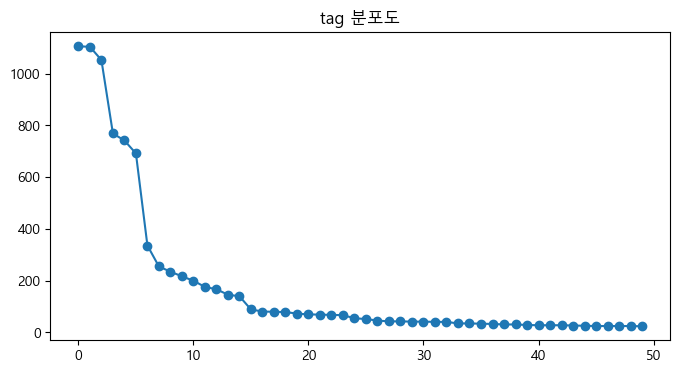

In [48]:
plt.figure(figsize= (8,4))
x = range(len(num_list))
#plt.ylim(0, 50)
xrange1 = 0
xrange2 = 50
plt.plot(x[xrange1:xrange2], num_list[xrange1:xrange2], '-o')
plt.title('tag 분포도')
plt.xlabel('')
plt.ylabel('')
plt.show()

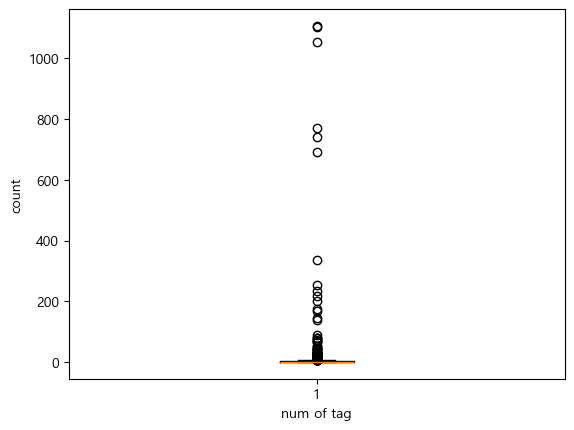

In [36]:
plt.boxplot(num_list)
plt.xlabel('num of tag')
plt.ylabel('count')
plt.show()

In [44]:
with open(f'../dataset/상의/{cat_name}/{cat_name}.txt', 'r', encoding= 'UTF8') as f:
    raw_data = f.readlines()
# print(raw_data)
data = []
for line in raw_data:
    data.append(line.strip().split(' ')[1:])
#print(data)
#print(len(data[1]))
hash_num_list = []
define_data = []
for line in data:
    if(len(line) > 5 ):
        define_data.append(line)
    hash_num_list.append(len(line))

#print(hash_num_list)
print(define_data)

[['#긴팔티셔츠', '#롱슬리브', '#데일리', '#온라인단독', '#그래픽티셔츠', '#로고티셔츠', '#티셔츠'], ['#롱슬리브', '#티셔츠', '#긴소매티', '#긴팔티', '#긴팔티셔츠', '#MIL', '#23SPRING'], ['#모크넥', '#모크넥티셔츠', '#긴팔티', '#기본티셔츠', '#터틀넥', '#터틀넥니트', '#긴팔', '#아울렛'], ['#긴팔티', '#롱슬리브', '#긴팔', '#로고티셔츠', '#남자티셔츠', '#롱슬리브티', '#긴팔티셔츠', '#아울렛'], ['#긴팔', '#롱슬리브티', '#레이어드', '#긴소매', '#긴팔티셔츠', '#오버핏티셔츠', '#쭉티'], ['#긴팔티', '#긴팔티셔츠', '#레이어드티', '#오버핏롱슬리브', '#오버핏쭉티', '#쭉티', '#커플티'], ['#롱슬리브', '#티셔츠', '#긴팔티', '#롱슬리브티', '#남자긴팔티', '#긴소매티', '#긴팔추천'], ['#23F/W', '#여성', '#우먼스컬렉션', '#우먼스', '#롱슬리브티', '#티셔츠', '#긴팔티', '#긴팔티셔츠', '#우먼라인'], ['#롱슬리브', '#긴팔티', '#긴소매티', '#긴팔', '#긴팔티셔츠', '#레글런', '#롱슬리브티'], ['#긴팔티셔츠', '#롱슬리브', '#데일리', '#온라인단독', '#그래픽티셔츠', '#로고티셔츠', '#티셔츠'], ['#롱슬리브티', '#슬림핏', '#티셔츠컬렉션', '#롱슬리브', '#오버핏', '#긴소매', '#티셔츠', '#LONGSLEEVE', '#OURDAILY컬렉션'], ['#롱슬리브', '#멀리컬러', '#보더티', '#스트라이프', '#오버핏', '#아울렛'], ['#오버핏', '#남자티셔츠', '#롱슬리브', '#긴팔티셔츠', '#티셔츠', '#헨리넥', '#라운드&브이넥니트'], ['#티셔츠', '#레이어드', '#우먼티셔츠', '#시즌오프', '#롱슬리브티', '#오버핏티셔츠', '#긴팔'], ['#티셔츠', '#티셔츠추천', '#가을티

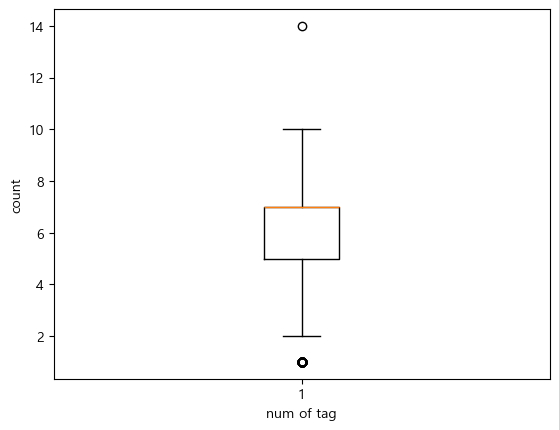

In [38]:
plt.boxplot(hash_num_list)
plt.xlabel('num of tag')
plt.ylabel('count')
plt.show()

In [ ]:

with open(f'{save_dir + cat_name}/{cat_name}.txt', 'r', encoding= 'UTF8') as f:
    raw_data = f.readlines()

data = []
for line in raw_data:
    data.append(line.strip().split(' ')[1:])

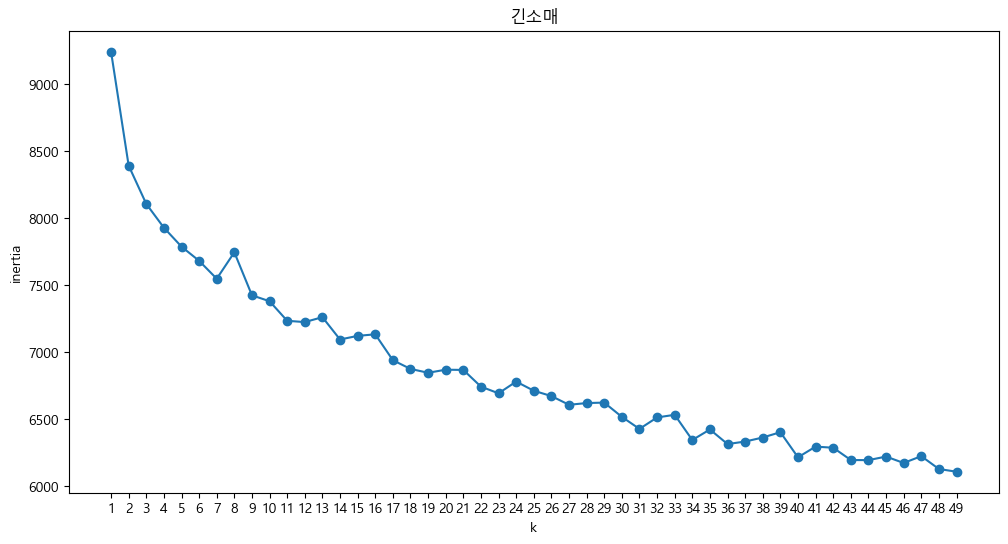

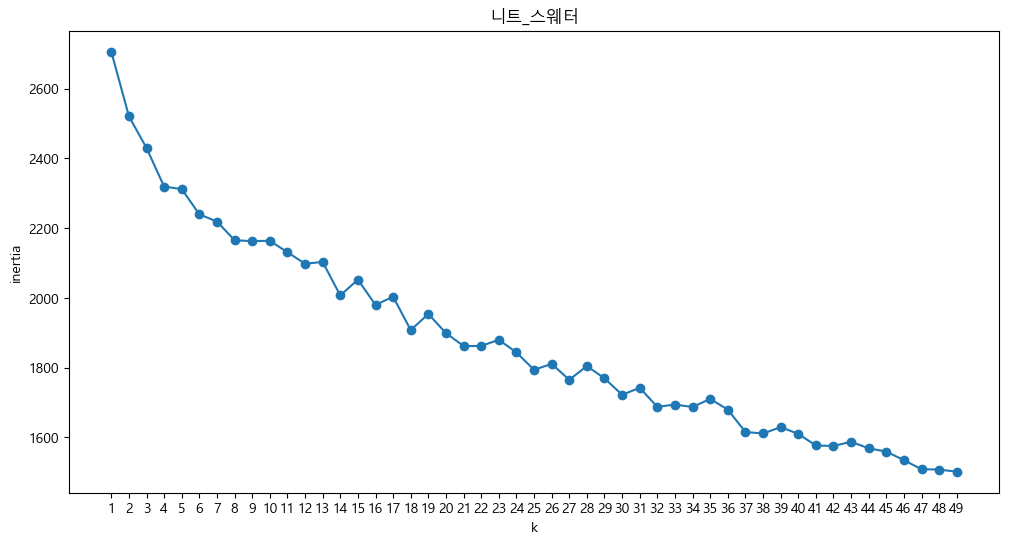

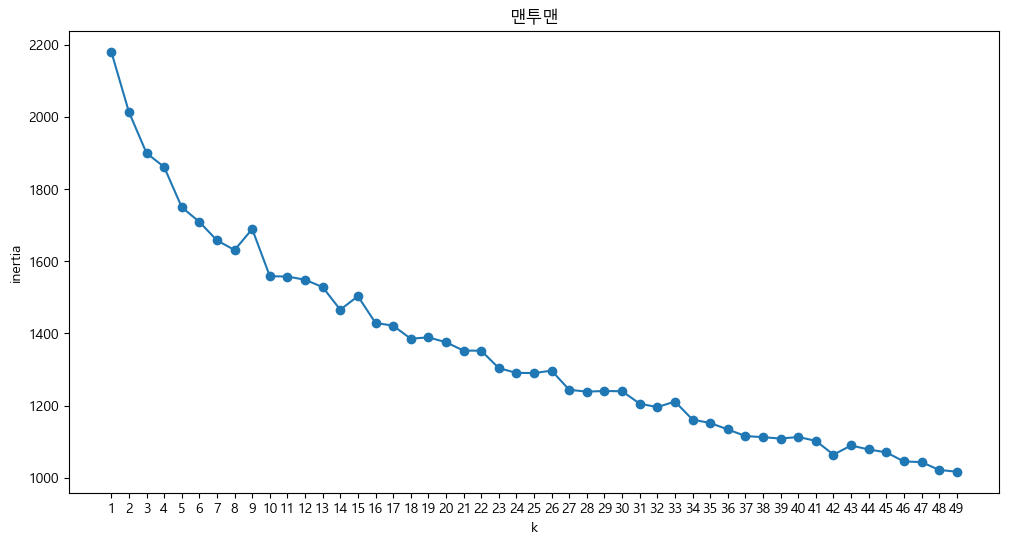

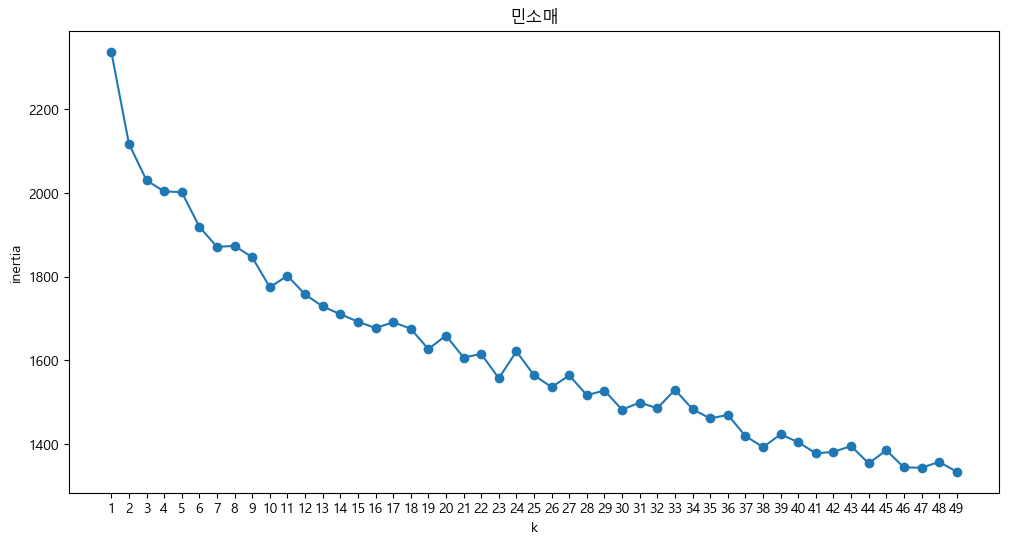

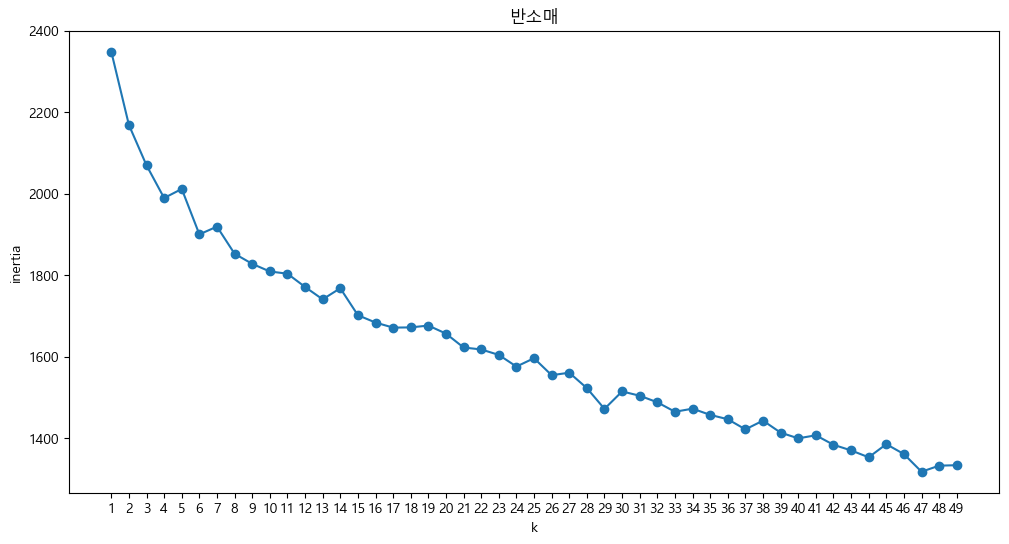

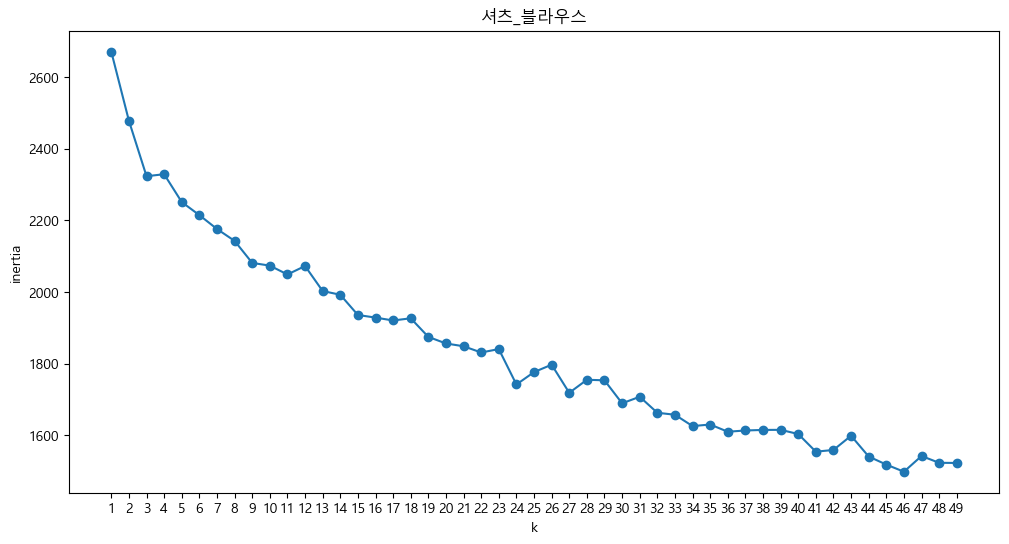

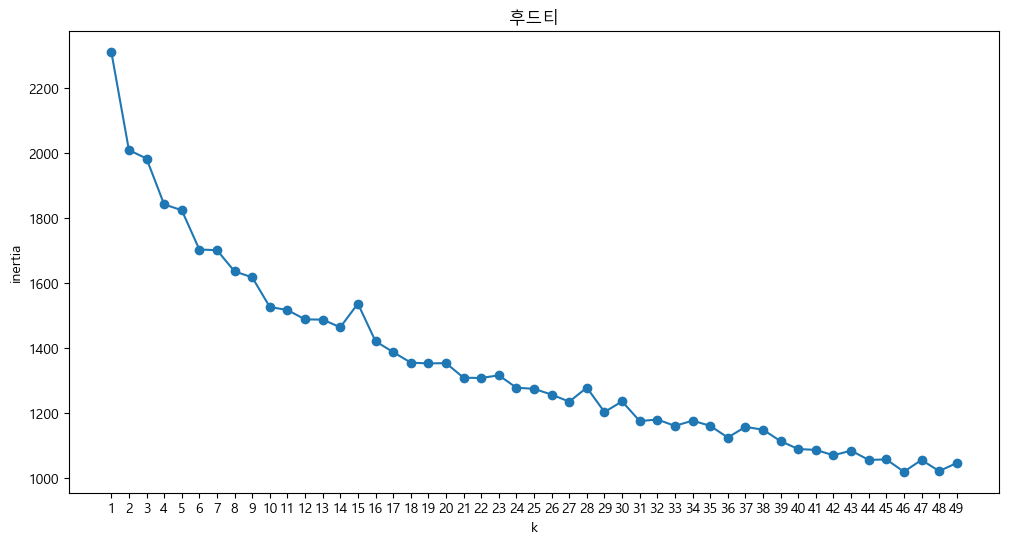

In [40]:
idx = 0

for df in df_list:
    # k 범위 설정
    k_range = range(1, 50)
    inertias = []
    score = []

    for k in k_range:
        model = KMeans(n_clusters= k)
        model.fit(df)
        #df['cluster'] = model.labels_
        #score.append(silhouette_samples(df, df['cluster']))
        inertias.append(model.inertia_)

    plt.figure(figsize= (12,6))
    plt.plot(k_range, inertias, '-o')
    plt.title(f'{name_list[idx]}')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.xticks(k_range)

    idx += 1

plt.show()